# Final Year Project

## 1.1 Importing Libraries

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np

# Graph Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Read csv file
import csv

# Train-test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

# Handling null values
from sklearn.impute import SimpleImputer

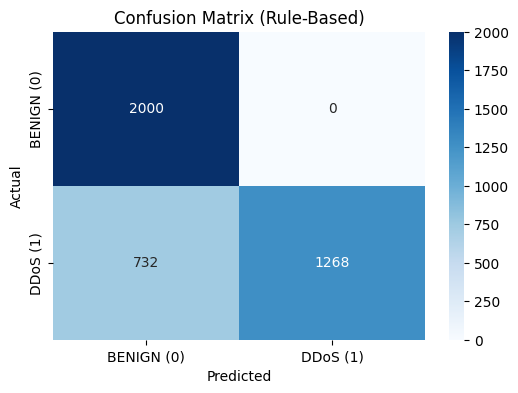

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the CSV
#df = pd.read_csv("modsec_audit_diff_ip.csv")
df = pd.read_csv("modsec_audit_222.csv")

#Strip all column names
df.columns = df.columns.str.strip()

# Define rule-based prediction
def predict_label(row):
    if row['response_status'] in [403,404] or any(rule in row['error_message'] for rule in ['920420', '920450', '949110', '980130']):
        return 1
    return 0

# Apply predictions
df['predicted_label'] = df.apply(predict_label, axis=1)

# Compute confusion matrix
cm = confusion_matrix(df['Label'], df['predicted_label'], labels=[0, 1])

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['BENIGN (0)', 'DDoS (1)'], yticklabels=['BENIGN (0)', 'DDoS (1)'])
plt.title('Confusion Matrix (Rule-Based)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [5]:
# True Labels and Predicted Labels
y_true_rb = df['Label']
y_pred_rb = df['predicted_label']

# Calculate metrics
accuracy_rb = accuracy_score(y_true_rb, y_pred_rb)
precision_rb = precision_score(y_true_rb, y_pred_rb)
recall_rb = recall_score(y_true_rb, y_pred_rb)
f1_rb = f1_score(y_true_rb, y_pred_rb)

# Print the results
print("ModSecurity - Accuracy:", accuracy_rb)
print("ModSecurity - Precision:", precision_rb)
print("ModSecurity - Recall:", recall_rb)
print("ModSecurity - F1-score:", f1_rb)

ModSecurity - Accuracy: 0.817
ModSecurity - Precision: 1.0
ModSecurity - Recall: 0.634
ModSecurity - F1-score: 0.7760097919216646


In [6]:
# Compute ROC curve for Rule-Based Logic
# Manually calculate the FPR and TPR
fpr_rb, tpr_rb, thresholds_rb = roc_curve(y_true_rb, y_pred_rb)
roc_auc_rb = auc(fpr_rb, tpr_rb)

In [7]:
print("False Positive Rate (FPR):", fpr_rb)
print("True Positive Rate (TPR):", tpr_rb)
print("Thresholds:", thresholds_rb)
print("AUC (Rule-Based):", roc_auc_rb)

False Positive Rate (FPR): [0. 0. 1.]
True Positive Rate (TPR): [0.    0.634 1.   ]
Thresholds: [inf  1.  0.]
AUC (Rule-Based): 0.817


## 1.2 Data Preprocessing

## 1.2.1 Preview DataFrame

In [10]:
df = pd.read_csv("modsec_audit_222.csv")

In [11]:
df.head()

,timestamp,transaction_id,remote_address,remote_port,local_address,local_port,request_line,host_header,user_agent,accept_header,...,stopwatch_p4,stopwatch_p5,stopwatch_sr,stopwatch_sw,stopwatch_l,stopwatch_gc,producer,server,engine_mode,Label
0,2025-05-26T02:12:14.519723,aDNdfvGyYx-yM8RJUJIzPAAAAAA,192.168.100.8,51978,192.168.100.5,80,GET / HTTP/1.1,192.168.100.5,curl/8.13.0,*/*,...,1023,434,139,1,0,0,ModSecurity for Apache/2.9.7 (http://www.modse...,Apache/2.4.58 (Ubuntu),ENABLED,0
1,2025-05-26T02:12:17.062626,aDNdgSusgvXYLKxlPANagAAAAAE,192.168.100.8,51470,192.168.100.5,80,GET / HTTP/1.1,192.168.100.5,curl/8.13.0,*/*,...,2506,292,110,1,0,0,ModSecurity for Apache/2.9.7 (http://www.modse...,Apache/2.4.58 (Ubuntu),ENABLED,0
2,2025-05-26T02:12:19.603136,aDNdg2GPq_L_TmKbowXjzQAAAAI,192.168.100.8,51484,192.168.100.5,80,GET / HTTP/1.1,192.168.100.5,curl/8.13.0,*/*,...,1020,407,112,1,0,0,ModSecurity for Apache/2.9.7 (http://www.modse...,Apache/2.4.58 (Ubuntu),ENABLED,0
3,2025-05-26T02:12:22.140672,aDNdhl5KIawvaatJOJXKNwAAAAM,192.168.100.8,51492,192.168.100.5,80,GET / HTTP/1.1,192.168.100.5,curl/8.13.0,*/*,...,1702,173,111,0,0,0,ModSecurity for Apache/2.9.7 (http://www.modse...,Apache/2.4.58 (Ubuntu),ENABLED,0
4,2025-05-26T02:12:24.686726,aDNdiP476dyxwebS_v223gAAAAQ,192.168.100.8,51506,192.168.100.5,80,GET / HTTP/1.1,192.168.100.5,curl/8.13.0,*/*,...,1036,2041,121,1,0,0,ModSecurity for Apache/2.9.7 (http://www.modse...,Apache/2.4.58 (Ubuntu),ENABLED,0


In [12]:
rows_columns = df.shape
data_samples = df.size

print("Rows & Columns: ", rows_columns)
print("Number of Samples: ", data_samples)

Rows & Columns:  (4000, 31)
Number of Samples:  124000


In [13]:
null_counts = df.isnull().sum()

print("Number of empty rows for each column: \n",null_counts)

Number of empty rows for each column: 
 timestamp               0
transaction_id          0
remote_address          0
remote_port             0
local_address           0
local_port              0
request_line            0
host_header             0
user_agent              0
accept_header        2001
response_protocol       0
response_status         0
last_modified        1268
etag                 1268
content_length          0
content_type            0
message                 0
error_message           0
stopwatch_p1            0
stopwatch_p2            0
stopwatch_p3            0
stopwatch_p4            0
stopwatch_p5            0
stopwatch_sr            0
stopwatch_sw            0
stopwatch_l             0
stopwatch_gc            0
producer                0
server                  0
engine_mode             0
Label                   0
dtype: int64


The features that has null values:
accept_header,
last_modified,
etag,

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   timestamp          4000 non-null   object
 1   transaction_id     4000 non-null   object
 2   remote_address     4000 non-null   object
 3   remote_port        4000 non-null   int64 
 4   local_address      4000 non-null   object
 5   local_port         4000 non-null   int64 
 6   request_line       4000 non-null   object
 7   host_header        4000 non-null   object
 8   user_agent         4000 non-null   object
 9   accept_header      1999 non-null   object
 10  response_protocol  4000 non-null   object
 11  response_status    4000 non-null   int64 
 12  last_modified      2732 non-null   object
 13  etag               2732 non-null   object
 14  content_length     4000 non-null   int64 
 15  content_type       4000 non-null   object
 16  message            4000 non-null   object


Most of the features contain object data type

In [17]:
null_count_accept_header = df['accept_header'].isnull().sum()
null_count_last_modified = df['last_modified'].isnull().sum()
null_count_etag = df['etag'].isnull().sum()

print(f"Nulls in 'accept_header': {null_count_accept_header}") #Expected 5466
print(f"Nulls in 'last_modified': {null_count_last_modified}") #Expected 3815
print(f"Nulls in 'etag': {null_count_etag}") #Expected 3815

Nulls in 'accept_header': 2001
Nulls in 'last_modified': 1268
Nulls in 'etag': 1268


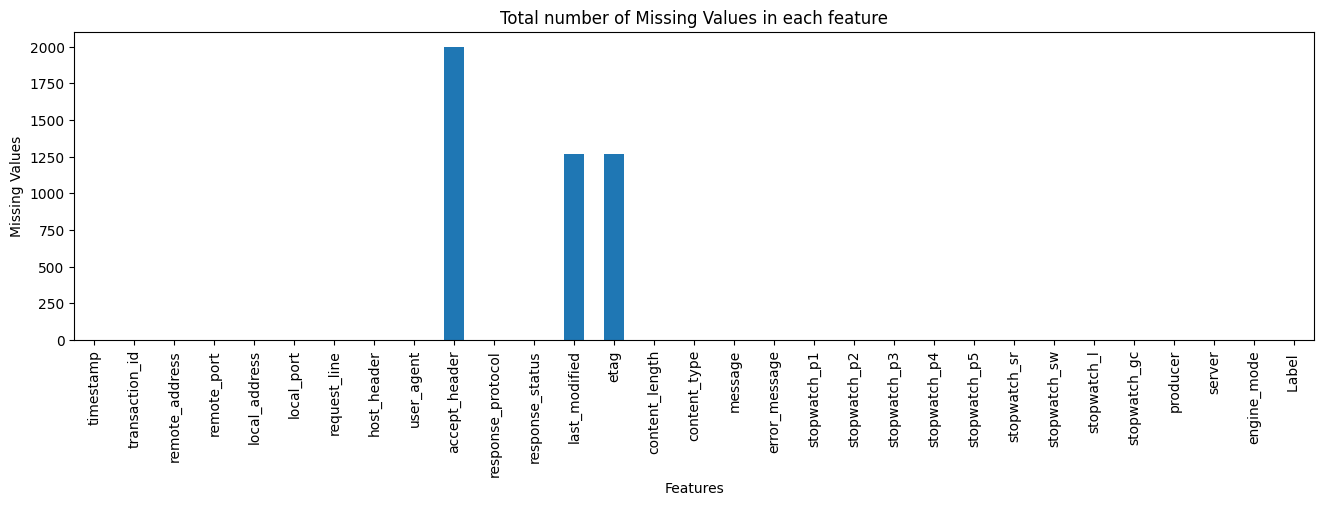

In [18]:
missing_values = df.isnull().sum()
fig = plt.figure(figsize=(16,4))
missing_values.plot(kind='bar')
plt.title('Total number of Missing Values in each feature')
plt.xlabel('Features')
plt.ylabel('Missing Values')
plt.show()

## 1.2.2 Handling Null, Inf/-Inf & NaN Values

In [20]:
#Drop Columns with empty rows
mod_df = df.drop(['accept_header','last_modified','etag'],axis=1)

In [21]:
#Drop Columns with object data type
mod_df = df.drop(['response_protocol','content_type','message','error_message','producer','server','engine_mode','timestamp','transaction_id'],axis=1)

In [22]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   remote_address   4000 non-null   object
 1   remote_port      4000 non-null   int64 
 2   local_address    4000 non-null   object
 3   local_port       4000 non-null   int64 
 4   request_line     4000 non-null   object
 5   host_header      4000 non-null   object
 6   user_agent       4000 non-null   object
 7   accept_header    1999 non-null   object
 8   response_status  4000 non-null   int64 
 9   last_modified    2732 non-null   object
 10  etag             2732 non-null   object
 11  content_length   4000 non-null   int64 
 12  stopwatch_p1     4000 non-null   int64 
 13  stopwatch_p2     4000 non-null   int64 
 14  stopwatch_p3     4000 non-null   int64 
 15  stopwatch_p4     4000 non-null   int64 
 16  stopwatch_p5     4000 non-null   int64 
 17  stopwatch_sr     4000 non-null   

In [23]:
#Convert IPv4 addresses to integer format 
import ipaddress

cols_to_convert = ['remote_address','local_address','host_header']
for col in cols_to_convert:
    mod_df[col] = mod_df [col].apply(lambda x: int(ipaddress.IPv4Address(x)) if pd.notnull(x) else None)

In [24]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   remote_address   4000 non-null   int64 
 1   remote_port      4000 non-null   int64 
 2   local_address    4000 non-null   int64 
 3   local_port       4000 non-null   int64 
 4   request_line     4000 non-null   object
 5   host_header      4000 non-null   int64 
 6   user_agent       4000 non-null   object
 7   accept_header    1999 non-null   object
 8   response_status  4000 non-null   int64 
 9   last_modified    2732 non-null   object
 10  etag             2732 non-null   object
 11  content_length   4000 non-null   int64 
 12  stopwatch_p1     4000 non-null   int64 
 13  stopwatch_p2     4000 non-null   int64 
 14  stopwatch_p3     4000 non-null   int64 
 15  stopwatch_p4     4000 non-null   int64 
 16  stopwatch_p5     4000 non-null   int64 
 17  stopwatch_sr     4000 non-null   

In [25]:
#Convert request_line with Label Encoding [BENIGN request: 0, DDoS request:1]
#Convert user_agent with label Encoding [BENIGN request: 0, DDoS request:1]
mod_df['request_line'] = (mod_df['request_line'] != 'GET / HTTP/1.1').astype(int)
mod_df['user_agent'] = (mod_df['user_agent'] != 'curl/8.13.0').astype(int)

In [26]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   remote_address   4000 non-null   int64 
 1   remote_port      4000 non-null   int64 
 2   local_address    4000 non-null   int64 
 3   local_port       4000 non-null   int64 
 4   request_line     4000 non-null   int32 
 5   host_header      4000 non-null   int64 
 6   user_agent       4000 non-null   int32 
 7   accept_header    1999 non-null   object
 8   response_status  4000 non-null   int64 
 9   last_modified    2732 non-null   object
 10  etag             2732 non-null   object
 11  content_length   4000 non-null   int64 
 12  stopwatch_p1     4000 non-null   int64 
 13  stopwatch_p2     4000 non-null   int64 
 14  stopwatch_p3     4000 non-null   int64 
 15  stopwatch_p4     4000 non-null   int64 
 16  stopwatch_p5     4000 non-null   int64 
 17  stopwatch_sr     4000 non-null   

In [27]:
mod_df = mod_df.drop(['accept_header','last_modified','etag'],axis=1)

In [28]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   remote_address   4000 non-null   int64
 1   remote_port      4000 non-null   int64
 2   local_address    4000 non-null   int64
 3   local_port       4000 non-null   int64
 4   request_line     4000 non-null   int32
 5   host_header      4000 non-null   int64
 6   user_agent       4000 non-null   int32
 7   response_status  4000 non-null   int64
 8   content_length   4000 non-null   int64
 9   stopwatch_p1     4000 non-null   int64
 10  stopwatch_p2     4000 non-null   int64
 11  stopwatch_p3     4000 non-null   int64
 12  stopwatch_p4     4000 non-null   int64
 13  stopwatch_p5     4000 non-null   int64
 14  stopwatch_sr     4000 non-null   int64
 15  stopwatch_sw     4000 non-null   int64
 16  stopwatch_l      4000 non-null   int64
 17  stopwatch_gc     4000 non-null   int64
 18  Label   

In [29]:
mod_df.head()

,remote_address,remote_port,local_address,local_port,request_line,host_header,user_agent,response_status,content_length,stopwatch_p1,stopwatch_p2,stopwatch_p3,stopwatch_p4,stopwatch_p5,stopwatch_sr,stopwatch_sw,stopwatch_l,stopwatch_gc,Label
0,3232261128,51978,3232261125,80,0,3232261125,0,200,10671,1840,734,42,1023,434,139,1,0,0,0
1,3232261128,51470,3232261125,80,0,3232261125,0,200,10671,1205,1135,55,2506,292,110,1,0,0,0
2,3232261128,51484,3232261125,80,0,3232261125,0,200,10671,942,790,43,1020,407,112,1,0,0,0
3,3232261128,51492,3232261125,80,0,3232261125,0,200,10671,1711,2990,44,1702,173,111,0,0,0,0
4,3232261128,51506,3232261125,80,0,3232261125,0,200,10671,941,662,65,1036,2041,121,1,0,0,0


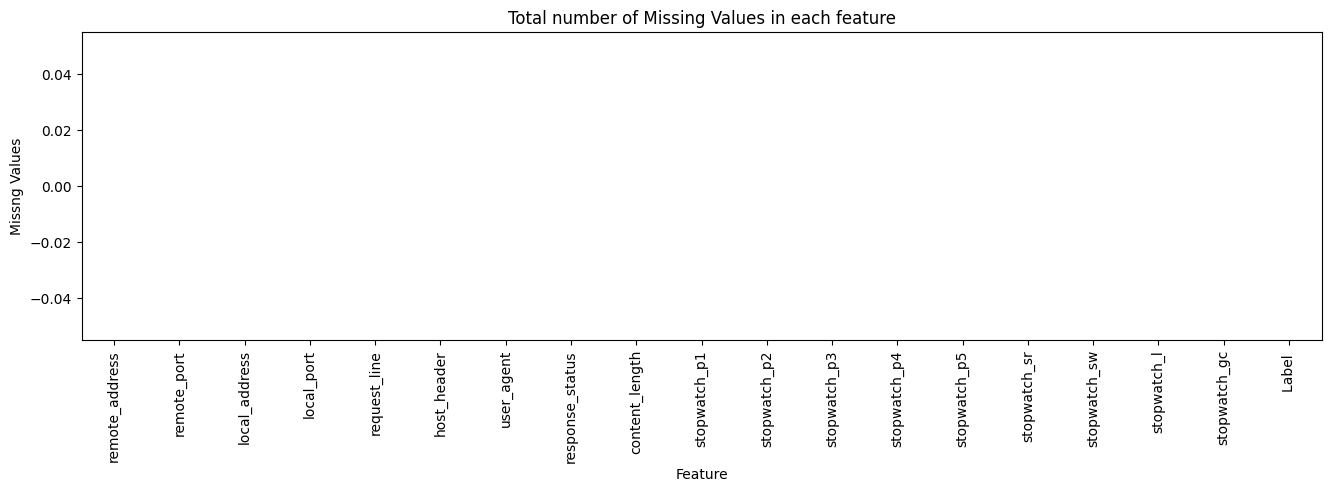

In [30]:
#Check for null values
missing_values = mod_df.isnull().sum()
fig = plt.figure(figsize=(16,4))
missing_values.plot(kind='bar')
plt.title('Total number of Missing Values in each feature')
plt.xlabel('Feature')
plt.ylabel('Missng Values')
plt.show()

In [31]:
#Remove the spaces before the column names
mod_df.columns = mod_df.columns.str.strip()
#Handling Inf/-Inf, NaN values
mod_df.replace([np.inf,-np.inf],np.nan,inplace=True)
mod_df = mod_df.dropna()

In [32]:
#Unique values in the label target column
mod_df.loc[:,'Label'].unique()

array([0, 1], dtype=int64)

In [33]:
#Count inf/-inf and NaN rows 
inf_rows = np.isinf(mod_df.select_dtypes(include=np.number)).any(axis=1).sum()
print(f"Rows with inf/-inf: {inf_rows}")
nan_rows = mod_df.isnull().any(axis=1).sum()
print(f"Rows with NaN: {nan_rows}")

Rows with inf/-inf: 0
Rows with NaN: 0


In [34]:
#Check which columns has inf/-inf values
inf_cols = mod_df.select_dtypes(include=np.number).columns[np.isinf(mod_df.select_dtypes(include=np.number)).any()]
print("Columns with inf/-inf:", inf_cols.tolist())

Columns with inf/-inf: []


In [35]:
#New shape
mods_rows_columns = mod_df.shape
mods_data_samples = mod_df.size

print("Rows & Columns: ", mods_rows_columns)
print("Number of Samples: ", mods_data_samples)

Rows & Columns:  (4000, 19)
Number of Samples:  76000


## 1.2.3 Distribution of Classes

In [37]:
print("Original class counts:\n", mod_df['Label'].value_counts())

Original class counts:
 Label
0    2000
1    2000
Name: count, dtype: int64


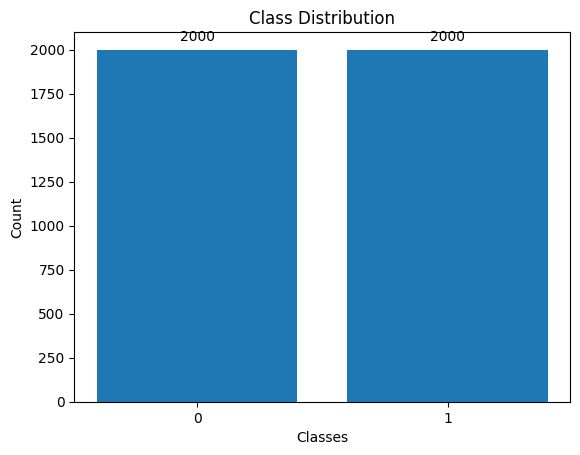

In [38]:
label_counts = mod_df['Label'].value_counts()


plt.bar(label_counts.index.astype(str),label_counts.values)

for i, count in enumerate(label_counts.values):
    plt.text(i,count+50,str(count),ha='center')

             
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# 1.3 Train-Test Split Data

In [40]:
X = mod_df.drop('Label',axis=1)
y = mod_df['Label']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [41]:
print(X.columns.tolist())

['remote_address', 'remote_port', 'local_address', 'local_port', 'request_line', 'host_header', 'user_agent', 'response_status', 'content_length', 'stopwatch_p1', 'stopwatch_p2', 'stopwatch_p3', 'stopwatch_p4', 'stopwatch_p5', 'stopwatch_sr', 'stopwatch_sw', 'stopwatch_l', 'stopwatch_gc']


In [42]:
training_dataset = X_train.shape
test_dataset = X_test.shape

print("Training dataset: ", training_dataset)
print("Test dataset: ", test_dataset)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Training dataset:  (2800, 18)
Test dataset:  (1200, 18)
X_train shape: (2800, 18)
y_train shape: (2800,)


## 1.4 Random Forest

In [44]:
rf_model = RandomForestClassifier(n_estimators=200,class_weight='balanced',random_state=42)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

# Get the probability value for each model
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

In [45]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



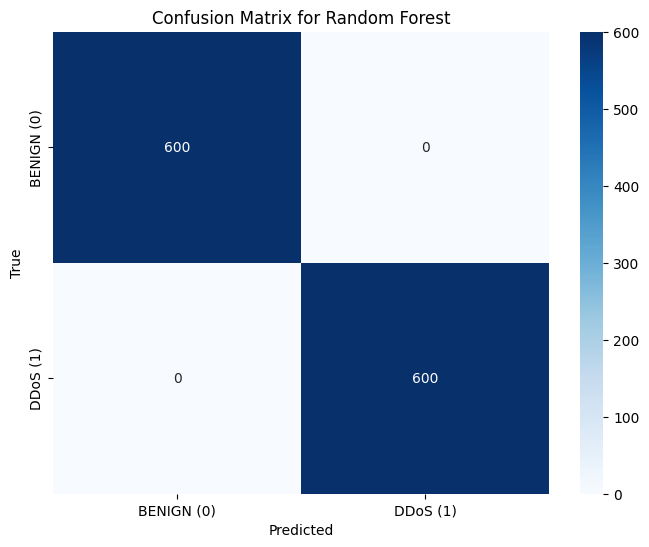

In [46]:
# Calculate confusion matrix
cm = confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=['BENIGN (0)', 'DDoS (1)'], 
            yticklabels=['BENIGN (0)', 'DDoS (1)'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-validation accuracy: 0.9998 ± 0.0005


In [48]:
# Calculate metrics
accuracy_rf = accuracy_score(y_test,y_pred_rf)
precision_rf = precision_score(y_test,y_pred_rf)
recall_rf = recall_score(y_test,y_pred_rf)
f1_rf = f1_score(y_test,y_pred_rf)

# Print metrics
print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - Precision:", precision_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1 Score:", f1_rf)

Random Forest - Accuracy: 1.0
Random Forest - Precision: 1.0
Random Forest - Recall: 1.0
Random Forest - F1 Score: 1.0


In [49]:
# ✅ 1. ip_to_int() Preprocessing Function
import pandas as pd
import ipaddress

def ip_to_int(X):
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=[
            'remote_address', 'remote_port', 'local_address', 'local_port',
            'request_line', 'host_header', 'user_agent', 'response_status',
            'content_length', 'stopwatch_p1', 'stopwatch_p2', 'stopwatch_p3',
            'stopwatch_p4', 'stopwatch_p5', 'stopwatch_sr', 'stopwatch_sw',
            'stopwatch_l', 'stopwatch_gc']
        )

    X = X.copy()
    for col in ['remote_address', 'local_address', 'host_header']:
        X[col] = X[col].apply(lambda x: int(ipaddress.IPv4Address(x)) if pd.notnull(x) else 0)

    X['request_line'] = (X['request_line'] != 'GET / HTTP/1.1').astype(int)
    X['user_agent'] = (X['user_agent'] != 'curl/8.13.0').astype(int)
    return X


# ✅ 2. Build & Save the Full Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib

from sklearn.ensemble import RandomForestClassifier  # Or use your existing model

# Sample model if you don't have rf_model loaded
rf_model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)  # Only if not trained yet

preprocessing = FunctionTransformer(ip_to_int, validate=False)

pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', rf_model)
])

joblib.dump(pipeline, 'ddos_rf2_pipeline.pkl')
print("\u2705 Pipeline saved as ddos_rf2_pipeline.pkl")


✅ Pipeline saved as ddos_rf2_pipeline.pkl


In [50]:
from custom_transformers import IPAddressTransformer, RequestUserAgentEncoder
from sklearn.pipeline import Pipeline
import joblib

# Build the full pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('ip_transform', IPAddressTransformer()),
    ('encode_transform', RequestUserAgentEncoder()),
    ('classifier', rf_model)  # trained RandomForestClassifier
])

# Save the pipeline to a .pkl file
joblib.dump(pipeline, "ddos_rf3_pipeline.pkl")
print("Pipeline saved as ddos_rf3_pipeline.pkl")


Pipeline saved as ddos_rf3_pipeline.pkl
